In [15]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import tgs, rgs
reload(tgs) 
reload(rgs) 

<module 'rgs' from '/Users/gordonwongyl/Documents/ORF/Reproduce_result/rgs.py'>

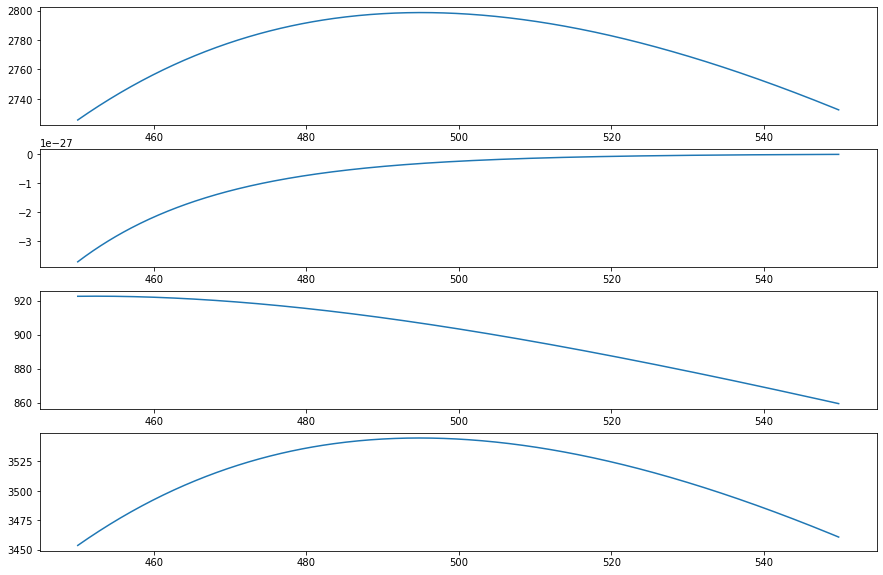

In [11]:
GAMMA = np.array([2e9, 100e9, 170e6, 100e9]) * 2 * np.pi
T_SPIN_COHERENCE = [13e-3, 4e-6, 1., 1.]
L_neighbour = [1.7e3, 30.3e3, 1.8e3, 1.7e3]
BRANCH_PARAM = [np.array([4,16,5]), np.array([1,1,19]), np.array([4,18,5]), np.array([4,16,5])]
L_delay = [398, 80.4, 627.9, 380.7]

L = 1000e3
L_ATT = 20e3

def tgs_ancilla(x, i):
    miu = tgs.Miu(L, L_ATT, L_delay=0, m=x)
    tree = tgs.Tree_ancilla(BRANCH_PARAM[i], miu=miu)
    time = tgs.Time(GAMMA[i], 500)
    error = tgs.Error(tree, time, t_spin_coherence=T_SPIN_COHERENCE[i])

    return tgs.effective_key_rate(tree, time, error, x, 2)

fig, ax = plt.subplots(4, figsize=(15,10))

for i in range(len(GAMMA)):
    
    M_axis = np.arange(450., 550., .2)
    R_eff_axis = np.zeros(M_axis.shape)
    for j in range(len(M_axis)):
        R_eff_axis[j] = tgs_ancilla(M_axis[j], i)
    ax[i].plot(M_axis, R_eff_axis)
    ax[i].set_xlabel("No. of stations (m)")
    ax[i].set_ylabel("R_eff (Hz)")
    fig.suptitle("tgs ancilla")

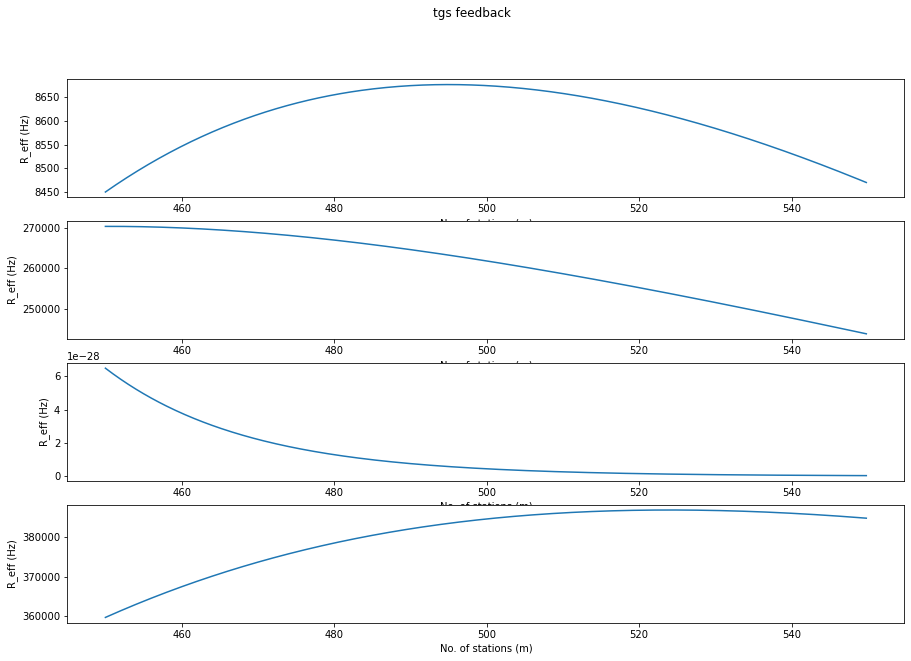

In [13]:
GAMMA = np.array([2e9, 100e9, 170e6, 100e9]) * 2 * np.pi
T_SPIN_COHERENCE = [13e-3, 4e-6, 1., 1.]
L_neighbour = [1.1e3, 2.2e3, 27e3, 1.9e3]
BRANCH_PARAM = [np.array([4,16,5]), np.array([4,22,6]), np.array([1,1,18]), np.array([4,15,5])]
L_feedback = [540.3, 16.5, 93.6, 11.3]
L_delay = [1.2e3, 37.1, 378., 25.6]

L = 1000e3
L_ATT = 20e3

def tgs_feedback(x, i):
    miu = tgs.Miu(L, L_ATT, L_delay=L_delay[i], m=x, L_feedback=L_feedback[i])
    tree = tgs.Tree_feedback(BRANCH_PARAM[i], miu=miu)
    time = tgs.Time(GAMMA[i], 500)
    error = tgs.Error(tree, time, t_spin_coherence=T_SPIN_COHERENCE[i])

    return tgs.effective_key_rate(tree, time, error, x, 1)

fig, ax = plt.subplots(4, figsize=(15,10))

for i in range(len(GAMMA)):
    
    M_axis = np.arange(450., 550., .2)
    R_eff_axis = np.zeros(M_axis.shape)
    for j in range(len(M_axis)):
        R_eff_axis[j] = tgs_feedback(M_axis[j], i)
    ax[i].plot(M_axis, R_eff_axis)
    ax[i].set_xlabel("No. of stations (m)")
    ax[i].set_ylabel("R_eff (Hz)")
    fig.suptitle("tgs feedback")

In [17]:
GAMMA = np.array([2e9, 100e9, 170e6, 100e9]) * 2 * np.pi
T_SPIN_COHERENCE = [13e-3, 4e-6, 1., 1.]
L_neighbour = [3.2e3, 500e3, 3.1e3, 3.2e3]
N = [32, 4, 32, 32]
BRANCH_PARAM = [np.array([24,7]), np.array([1,1]), np.array([24,7]), np.array([24,7])]
L_delay = [483.5, 20., 516.6, 480.5]

L = 1000e3
L_ATT = 20e3

def rgs_ancilla(x, i):
    miu = tgs.Miu(L/2, L_ATT, L_delay=L_delay[i], m=x)
    rgs_ancilla = rgs.RGS_ancilla(BRANCH_PARAM[i], N[i], miu=miu)
    time = tgs.Time(GAMMA[i], 500)
    error = rgs.RGS_Error(rgs_ancilla, time, T_SPIN_COHERENCE[i])
    return rgs.effective_key_rate(rgs_ancilla, time, error, x, 3, L, L_ATT)

fig, ax = plt.subplots(4, figsize=(15,10))

for i in range(len(GAMMA)):
    
    M_axis = np.arange(450., 550., .2)
    R_eff_axis = np.zeros(M_axis.shape)
    for j in range(len(M_axis)):
        R_eff_axis[j] = rgs_ancilla(M_axis[j], i)
    ax[i].plot(M_axis, R_eff_axis)
    ax[i].set_xlabel("No. of stations (m)")
    ax[i].set_ylabel("R_eff (Hz)")
    fig.suptitle("rgs ancilla")

/Users/gordonwongyl/Documents/ORF/Reproduce_result/tgs.py:318: RuntimeWarning: invalid value encountered in log2
  return  - x*np.log2(x) - (1-x)*np.log2(1-x)
